In [9]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
digits = load_digits()

digits.keys()

dict_keys(['target_names', 'target', 'data', 'images', 'DESCR'])

In [4]:
data = pd.DataFrame(digits["data"])

labels = pd.Series(digits["target"])

data.shape

(1797, 64)

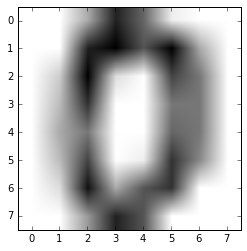

In [10]:
# Show first image. Must be 8x8 due to being 64 column dataframe

first_img = data.iloc[0].values.reshape(8,8)

plt.imshow(first_img, cmap="gray_r")

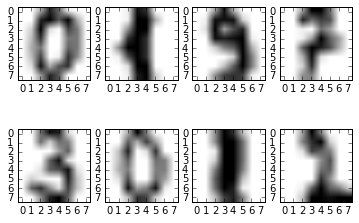

In [11]:
fig, axesarr = plt.subplots(2,4)

np_row_1_image = data.iloc[0].values.reshape(8,8)
np_row_100_image = data.iloc[99].values.reshape(8,8)
np_row_200_image = data.iloc[199].values.reshape(8,8)
np_row_300_image = data.iloc[299].values.reshape(8,8)
np_row_1000_image = data.iloc[999].values.reshape(8,8)
np_row_1100_image = data.iloc[1099].values.reshape(8,8)
np_row_1200_image = data.iloc[1199].values.reshape(8,8)
np_row_1300_image = data.iloc[1299].values.reshape(8,8)


axesarr[0,0].imshow(np_row_1_image, cmap="gray_r")
axesarr[0,1].imshow(np_row_100_image, cmap="gray_r")
axesarr[0,2].imshow(np_row_200_image, cmap="gray_r")
axesarr[0,3].imshow(np_row_300_image, cmap="gray_r")
axesarr[1,0].imshow(np_row_1000_image, cmap="gray_r")
axesarr[1,1].imshow(np_row_1100_image, cmap="gray_r")
axesarr[1,2].imshow(np_row_1200_image, cmap="gray_r")
axesarr[1,3].imshow(np_row_1300_image, cmap="gray_r")

In [16]:
# Split data into a train and test set (50/50)

split_row_limit = int(data.shape[0]/2)

train = data.iloc[:split_row_limit]
test = data.iloc[split_row_limit:]

In [30]:
# Create training KNN Function

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

def train_knn(num_neighbors, features, labels):
    knn = KNeighborsClassifier(num_neighbors)
    knn.fit(features, labels)
    return knn

test = train_knn(5, data, labels)

In [33]:
# Create testing accuracy of KNN Function

def test_knn(knn_model, test_features, test_labels):
    predictions = knn_model.predict(test_features)
    
    df = pd.DataFrame()
    df["labels"] = test_labels
    df["predictions"] = predictions
    accuracy = sum(df["predictions"] == df["labels"]) / len(df)
    
    return accuracy

test_knn(test, data, labels)

0.9905397885364496

With a k-value of 1 accuracy is:  0.9677233358079684
With a k-value of 11 accuracy is:  0.9527047760455333
With a k-value of 21 accuracy is:  0.9482566196486018
With a k-value of 31 accuracy is:  0.9376787923781242
With a k-value of 41 accuracy is:  0.9293256619648602
With a k-value of 51 accuracy is:  0.9243157634248949
With a k-value of 61 accuracy is:  0.9181947537738183
With a k-value of 71 accuracy is:  0.9154095520910666
With a k-value of 81 accuracy is:  0.9065070527097253
With a k-value of 91 accuracy is:  0.8987156644394951


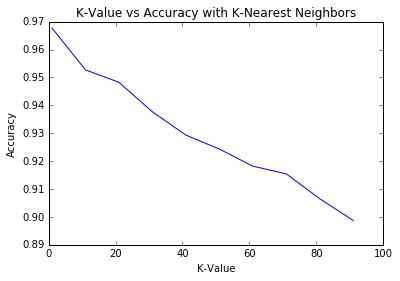

In [76]:
# Use K-Fold to cross-validate our train and test KNN model
# Based on k-variable passed in

def cross_validate(k):
    accuracies = []
    kf = KFold(n_splits=4, random_state=1)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        
        knn_model = train_knn(k, train_features, train_labels)
        accuracy = test_knn(knn_model, test_features, test_labels)
        accuracies.append(accuracy)
    return accuracies

test_accuracies = []
for i in range(1, 100, 10):
    accuracies = cross_validate(i)
    avg_acc = np.mean(accuracies)
    test_accuracies.append(avg_acc)
    print("With a k-value of", str(i), "accuracy is: ", avg_acc)
    

x = list(range(1,100, 10))
plt.plot(x, test_accuracies)
plt.xlabel("K-Value")
plt.ylabel("Accuracy")
plt.title("K-Value vs Accuracy with K-Nearest Neighbors")


In [85]:
# Build a train, test and K-Fold Validation function
# For a Neural Network model.

from sklearn.neural_network import MLPClassifier

def train_mlp(layers, features, labels):
    mlp = MLPClassifier(hidden_layer_sizes=layers)
    mlp.fit(features, labels)
    return mlp

test = train_mlp(1, data, labels)

In [57]:
# Create testing accuracy of MLP Function

def test_mlp(mlp_model, test_features, test_labels):
    predictions = mlp_model.predict(test_features)
    
    df = pd.DataFrame()
    df["labels"] = test_labels
    df["predictions"] = predictions
    accuracy = sum(df["predictions"] == df["labels"]) / len(df)
    
    return accuracy

test_mlp(test, data, labels)

0.890929326655537

In [97]:
# Test Crossfold Validation

def cross_validate(k):
    accuracies = []
    kf = KFold(n_splits=4, random_state=1)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        
        mlp = train_mlp(k, train_features, train_labels)
        accuracy = test_mlp(mlp, test_features, test_labels)
        accuracies.append(accuracy)
    return accuracies

test_neurons = [8, 16, 32, 64, 128, 256]

for number in test_neurons:
    accuracies = cross_validate(number)
    print("With a k-value of", str(number), "accuracy is: ", np.mean(accuracies))

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



With a k-value of 8 accuracy is:  0.8419413511507052
With a k-value of 16 accuracy is:  0.9165181885671864
With a k-value of 32 accuracy is:  0.9248700816629547
With a k-value of 64 accuracy is:  0.9337750556792873
With a k-value of 128 accuracy is:  0.9443442217272953
With a k-value of 256 accuracy is:  0.8914587973273942


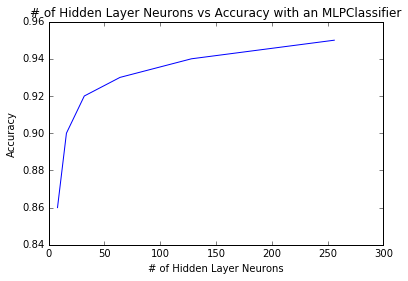

In [78]:
x = [8, 16, 32, 64, 128, 256]
y = [.86, .90, .92, .93, .94, .95]

plt.plot(x,y)
plt.xlabel("# of Hidden Layer Neurons")
plt.ylabel("Accuracy")
plt.title("# of Hidden Layer Neurons vs Accuracy with an MLPClassifier")


## Results

Overall, the two models had similarly accurate results, with:

* K-Nearest Neighbors maintaining a maximum accuracy of 96%
* The Neural Network achieving an accuracy rate of 95%

Based on these results, there doesn't appear to be a huge advantage for accuracy of each model. However, K-Nearest Neighbors is significantly faster due to the overhead of the hidden layer size of neural networks.

## Using Two Hidden Layers in the MLPClassifier

In [100]:
two_layer_neurons = [(64,64), (128,128), (256,256)]


for neurons in two_layer_neurons:
    accuracies = cross_validate(neurons)
    print("hidden layer value of: ",
          str(neurons), "accuracy is: ",
          round(np.mean(accuracies),4))

hidden layer value of:  (64, 64) accuracy is:  0.9416


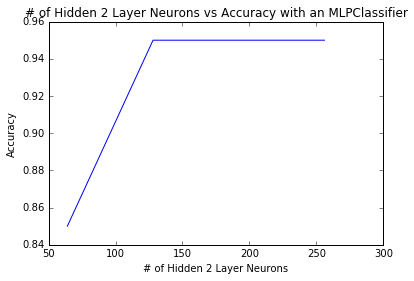

In [101]:
x = [64, 128, 256]
y = [.94, .95, .95]

plt.plot(x,y)
plt.xlabel("# of Hidden 2 Layer Neurons")
plt.ylabel("Accuracy")
plt.title("# of Hidden 2 Layer Neurons vs Accuracy with an MLPClassifier")


## Performance of Two Hidden Layers

Overall adding another hidden layer of neurons improved our model's simple accuracy up to 95%.

While this could be due to overfitting, the k-fold validation seems to show the model can generalize with extra neurons for the 1% performance value versus the single neurons from earlier.

## Using Three Hidden Layers in the MLPClassifier

 While more hidden layers may lead to overfitting, we'll use a k-fold validation of 6 to check to make sure that doesn't happen

In [ ]:
three_layer_neurons = [(10,10,10), (64,64,64), (128,128,128)]

def cross_validate(k):
    accuracies = []
    kf = KFold(n_splits=6, random_state=1)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        
        mlp = train_mlp(k, train_features, train_labels)
        accuracy = test_mlp(mlp, test_features, test_labels)
        accuracies.append(accuracy)
    return accuracies

for neurons in three_layer_neurons:
    accuracies = cross_validate(neurons)
    print("hidden layer value of: ",
          str(neurons), "accuracy is: ",
          round(np.mean(accuracies),4))

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



hidden layer value of:  (10, 10, 10) accuracy is:  0.8882
hidden layer value of:  (64, 64, 64) accuracy is:  0.9482


In [ ]:
x = [10, 64, 128]
y = [.8882, .9482, .95]

plt.plot(x,y)
plt.xlabel("# of Hidden 3 Layer Neurons")
plt.ylabel("Accuracy")
plt.title("# of Hidden 3 Layer Neurons vs Accuracy with an MLPClassifier")


## Performance of Three Hidden Layers

Overall adding another three hidden layers of neurons improved our model's simple accuracy from 88% to 96%.

This seems to showcase the research that more neurons and more layers improves model performance, especially in the areas of computer vision.